# Implementation of hash tables
## Linear probing

Java version: https://github.com/ksattler/algoj/blob/master/ch_15/HashTable.java

In [1]:
class HashTable:
    def __init__(self, size):
        self.size = size
        # None stands for a free field entry!
        self.table = [None] * self.size

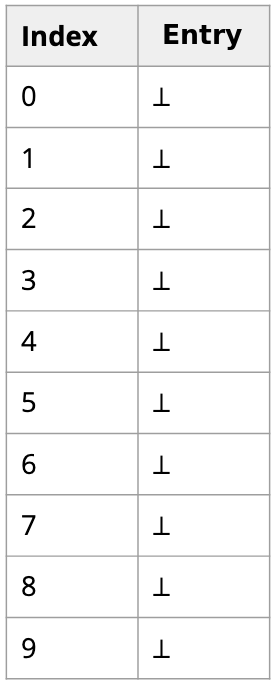

In [2]:
T = HashTable(10)
T.table[0]

### Insertion Operation (Linear Probing)

In [3]:
class HashTable:
    def __init__(self, size):
        self.size = size
        # None stands for a free field entry!
        self.table = [None] * self.size

    def hashCode(self, v):
        return v

    def insert(self, v):
        # 1) Hashcode calculation:
        hc = self.hashCode(v)

        # 2) Compression:
        oidx = idx = hc % self.size

        while self.table[idx] != None:
            # Collision detected!
            if v == self.table[idx]:
                return True
            # Jump for linear probing
            idx = idx + 1
            idx = idx % self.size
      
            # Original collision position reached again?
            if idx == oidx:
                # Overflow!
                return False

        # Free bucket found!
        self.table[idx] = v
        return True

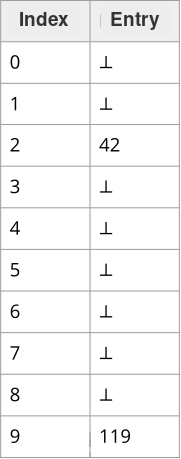

In [5]:
T = HashTable(10)
T.insert(42)
T.insert(119)

True

Verification via direct access to the table:

In [6]:
T.table[2]

42

In [7]:
T.table[9]

119

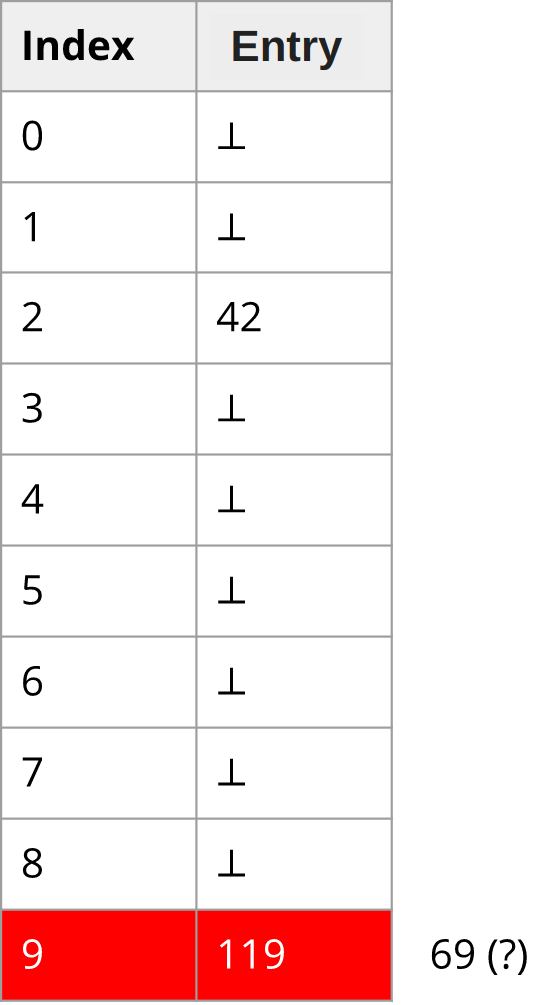

In [8]:
T.insert(69)

True

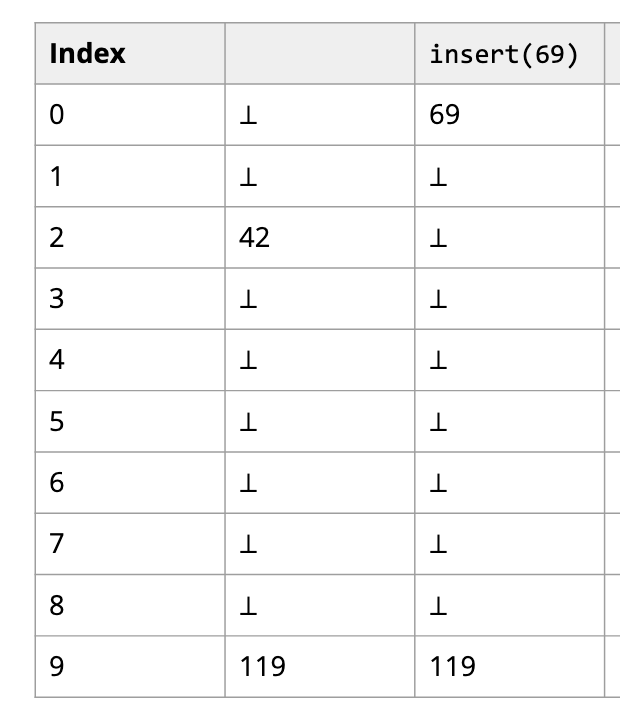

In [9]:
T.table[9]

119

In [10]:
T.table[0]

69

### Search operation (linear probing)

In [11]:
class HashTable:
    def __init__(self, size):
        self.size = size
        # None stands for a free field entry!
        self.table = [None] * self.size

    def hashCode(self, v):
        return v

    def insert(self, v):
        # 1) Hashcode calculation:
        hc = self.hashCode(v)

        # 2) Compression:
        oidx = idx = hc % self.size

        while self.table[idx] != None:
            # Collision detected!
            if v == self.table[idx]:
                return True
            # Jump for linear probing
            idx = idx + 1
            idx = idx % self.size
      
            # Original collision position reached again?
            if idx == oidx:
                # Overflow!
                return False

        # Free bucket found!
        self.table[idx] = v
        return True
    
    def contains(self, v):
        oidx = idx = self.hashCode(v) % self.size
        
        while self.table[idx] != None:
            if v == self.table[idx]:
                return True
            idx = idx + 1
            idx = idx % self.size
            if idx == oidx:
                break
        return False

In [12]:
T = HashTable(10)
T.insert(42)
T.insert(119)
T.insert(69)

True

In [13]:
T.contains(69)

True

In [14]:
T.contains(2)

False

## Chaining

Java version: https://github.com/ksattler/algoj/blob/master/ch_15/LinkedHashTable.java

In [20]:
class HashTable:
    def __init__(self, size):
        self.size = size
        # None stands for a free field entry!
        self.table = [None] * self.size

    def hashCode(self, v):
        return v

    def insert(self, v):
        # 1) Hashcode calculation:
        hc = self.hashCode(v)

        # 2) compression:
        oidx = idx = hc % self.size
        
        if self.table[idx] == None:
            # no list available yet
            self.table[idx] = []
        
        self.table[idx].append(v)
        
    def contains(self, v):
        # Determine Hash table index via hash value
        idx = self.hashCode(v) % self.size
        if self.table[idx] != None:
            # List found
            for i in self.table[idx]:
                # sequential search for element
                if i == v:
                    return True
        return False

In [21]:
T = HashTable(10)
T.insert(42)
T.insert(119)
T.insert(69)

In [22]:
T.table[2]

[42]

In [23]:
T.table[9]

[119, 69]

In [24]:
T.table[0]